In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#Lectura de csv
df = pd.read_csv("../../data/df_te.csv")
df.sample(5)

,Precio,Tipo de Propiedad,Exterior,Habitaciones,Baños,Provincia,Mostrar Dirección,Tiene Video,Tiene Plano,Tiene 360,Ascensor,Tamaño_robust,Distancia_robust
228,730.0,681.418301,681.49481,689.131332,685.558824,697.296774,680.507463,691.440441,691.007843,706.864550,679.870971,-0.266667,-0.234529
204,658.0,681.418301,681.49481,689.131332,663.395530,697.296774,688.751480,678.348548,691.007843,675.286765,684.527919,0.633333,0.283951
61,725.0,681.418301,681.49481,671.204570,685.558824,697.296774,680.507463,691.440441,691.007843,675.286765,684.527919,-0.300000,-0.250890
259,750.0,681.418301,681.49481,683.142537,685.558824,697.296774,680.507463,691.440441,691.007843,706.864550,684.527919,0.500000,0.664322
273,750.0,681.418301,681.49481,671.204570,685.558824,697.296774,680.507463,678.348548,677.895197,675.286765,684.527919,-0.900000,-0.351560


In [3]:
# Creacion de x (variables explicativas) e y (variable respuesta)
x=df.drop("Precio",axis=1)
y=df[["Precio"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [4]:
params_arbol = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [50, 100, 150],
    'max_leaf_nodes': [30, 40, 50, 60, 70, 100]
}

randomized_search_arbol = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=params_arbol,
    n_iter=100,
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

randomized_search_arbol.fit(x_train, y_train)
modelo_arbol_final=randomized_search_arbol.best_estimator_

In [5]:
y_train_pred=modelo_arbol_final.predict(x_train)
y_test_pred=modelo_arbol_final.predict(x_test)

In [6]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.359900,46.798600,3750.265300,61.239400
Test,0.253600,46.642000,3544.248200,59.533600
Diferenceia Train-Test,0.106300,0.156600,206.017100,1.705800
Porcentaje diferencia (%),41.916400,0.335700,5.812700,2.865300
Media,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.044877,6.835093,533.586870,8.834432
Influencia dif media (%),0.015600,0.022900,30.139900,0.249600
Mediana,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.043204,6.580324,513.698134,8.505141
Influencia dif mediana (%),0.015000,0.022100,29.016500,0.240300


- R² Score:
El modelo explica ~36% de la variabilidad en entrenamiento y ~25% en prueba, lo cual es bajo. Hay margen para mejorar la capacidad predictiva.
- Errores (MAE y RMSE):
Los errores son consistentes entre entrenamiento y prueba (MAE ~46, RMSE ~60), lo que indica estabilidad, pero los valores son relativamente altos.
- Diferencia Train-Test:
Las diferencias entre ambos conjuntos son pequeñas (R² ~10%, RMSE ~3%), lo que sugiere que el modelo no está sobreajustado.
- Relación con los datos (Media/Mediana):
Los errores representan ~6.8% de la media, lo que es aceptable, pero mejorar estos porcentajes aumentará la precisión.
- Conclusión:
El modelo es estable pero tiene una capacidad predictiva limitada. Prueba modelos más complejos como Random Forest o Gradient Boosting para mejorar estas métricas.

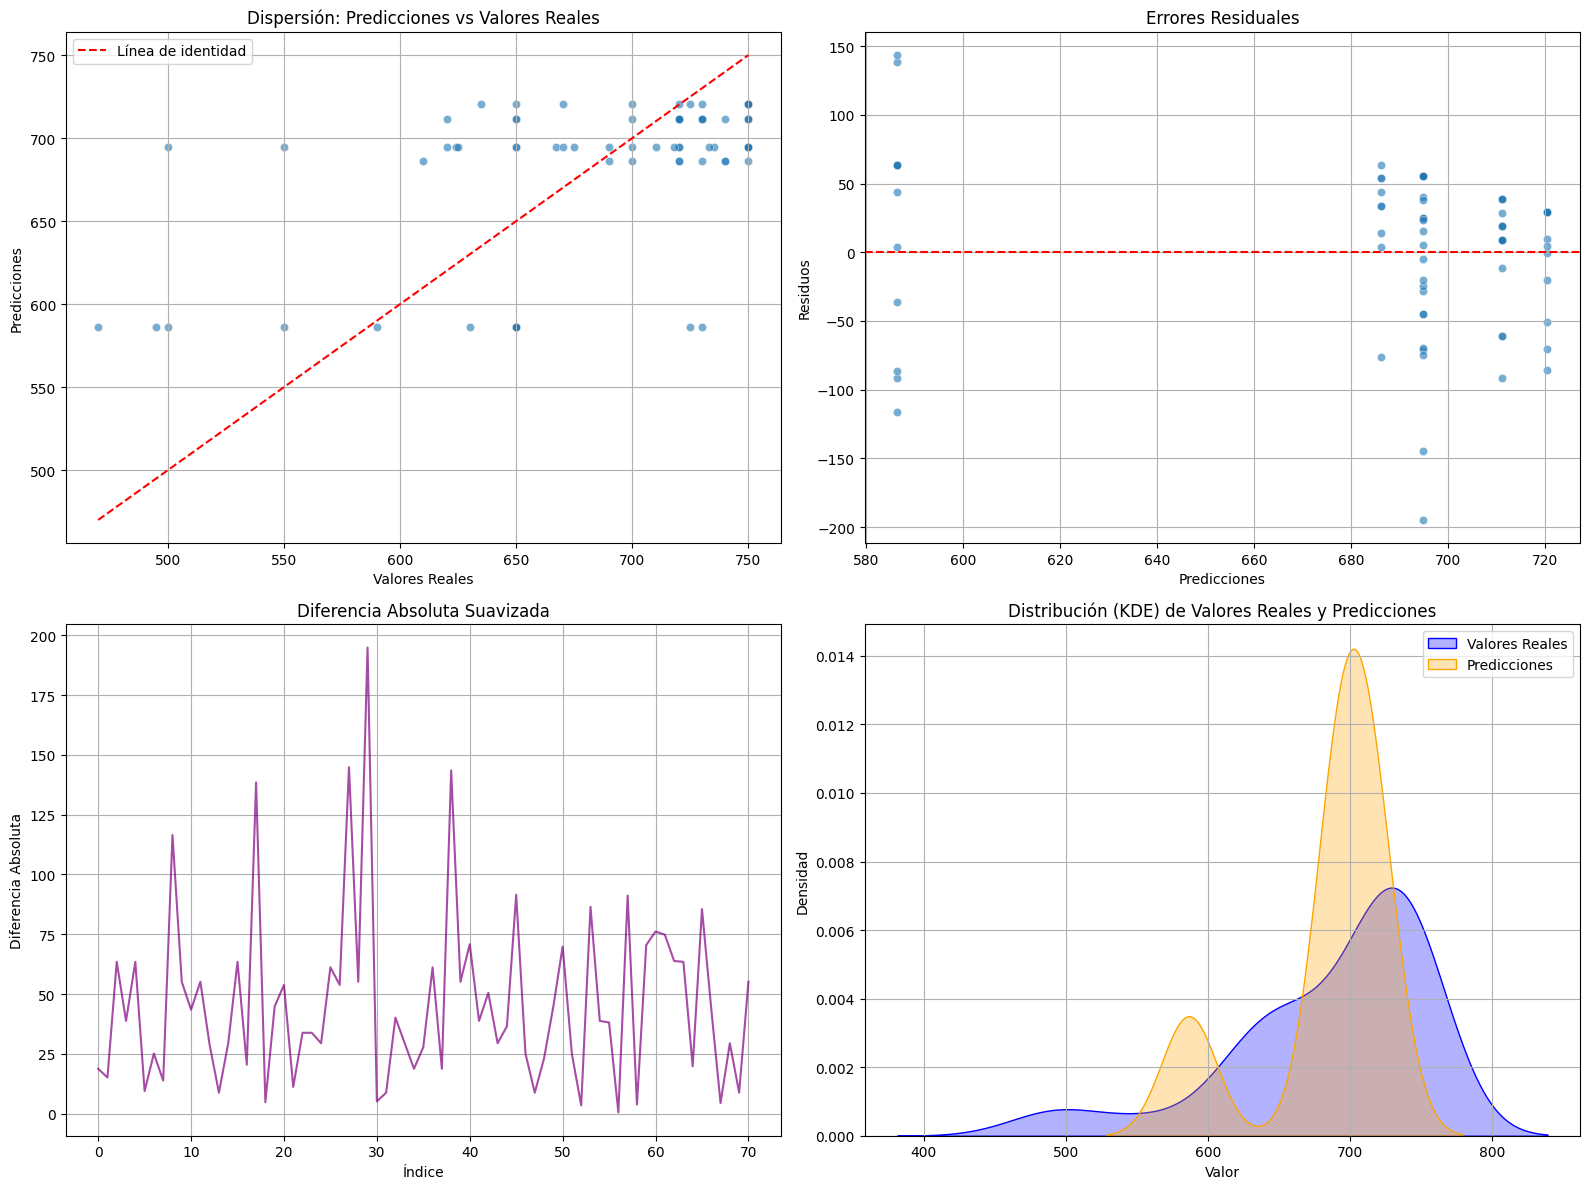

In [7]:
sp.comparativa_graficos(y_test, y_test_pred)

El modelo predice de forma razonable, pero tiene dificultades con valores bajos y algunos outliers generan errores significativos. Las predicciones siguen la distribución general de los valores reales, aunque no coinciden del todo en algunos rangos. Podría mejorarse ajustando las variables, tratando los outliers y probando modelos más avanzados como Random Forest o Gradient Boosting.

### PROBAMOS A MEJORAR EL MODELO ELIMINANDO VARIABLES CON POCA REPERCUSIÓN

Calculamos la correlación de las variables con "price" para ver cuales pueden ser eliminadas por no ser representativas en el modelo

Correlaciones con 'Precio':
Precio               1.000000
Provincia            0.536239
Tiene 360            0.176591
Habitaciones         0.107024
Baños                0.105857
Tiene Plano          0.083271
Tiene Video          0.081027
Mostrar Dirección    0.046862
Tipo de Propiedad    0.036378
Ascensor             0.030791
Exterior             0.028026
Tamaño_robust       -0.076692
Distancia_robust    -0.516021
Name: Precio, dtype: float64


c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\2-Modeling\../../src\support_modeling.py:375: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")


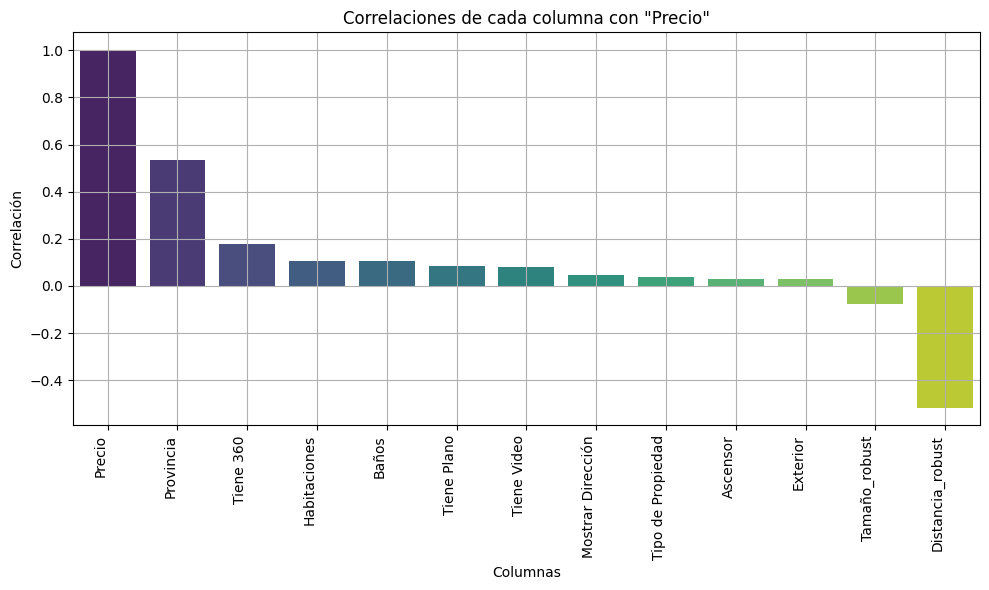


Columnas con baja correlación (abs < 0.05):
['Mostrar Dirección', 'Tipo de Propiedad', 'Ascensor', 'Exterior']


['Mostrar Dirección', 'Tipo de Propiedad', 'Ascensor', 'Exterior']

In [8]:
sp.analizar_correlaciones(df, "Precio", threshold=0.05)

In [9]:
# Excluir columnas irrelevantes según el análisis previo
columns_to_exclude = ['Mostrar Dirección', 'Tipo de Propiedad', 'Ascensor', 'Exterior']
df_filtered = df.drop(columns=columns_to_exclude)

In [10]:
# Definir las características (X) y la variable objetivo (y)
x2 = df_filtered.drop(columns=['Precio'])
y2 = df_filtered['Precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [11]:
# Definir el grid de parámetros
params_arbol = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [50, 100, 150],
    'max_leaf_nodes': [30, 40, 50, 60, 70, 100]
}
# Configurar GridSearchCV
model_DecisionTreeRegressor2 = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=params_arbol,
    n_iter=100,
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

# Entrenar el modelo con GridSearchCV
model_DecisionTreeRegressor2.fit(x_train2, y_train2)

# Mostrar los mejores parámetros y el error asociado
best_params = model_DecisionTreeRegressor2.best_params_

print(f"Mejores parámetros: {best_params}")

Mejores parámetros: {'min_samples_split': 20, 'min_samples_leaf': 50, 'max_leaf_nodes': 100, 'max_depth': 10}


In [12]:
y_pred_test2 = model_DecisionTreeRegressor2.predict(x_test2)
y_pred_train2 = model_DecisionTreeRegressor2.predict(x_train2)
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

,r2_score,MAE,MSE,RMSE
Train,0.359900,46.917800,3750.665200,61.242700
Test,0.240300,47.382400,3607.348800,60.061200
Diferenceia Train-Test,0.119600,-0.464600,143.316400,1.181500
Porcentaje diferencia (%),49.771100,-0.990200,3.972900,1.967200
Media,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.043904,6.897972,538.231873,8.873267
Influencia dif media (%),0.017500,0.068000,20.966900,0.172900
Mediana,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.042268,6.640859,518.170000,8.542528
Influencia dif mediana (%),0.016800,0.065400,20.185400,0.166400


No ha habido apenas diferencias

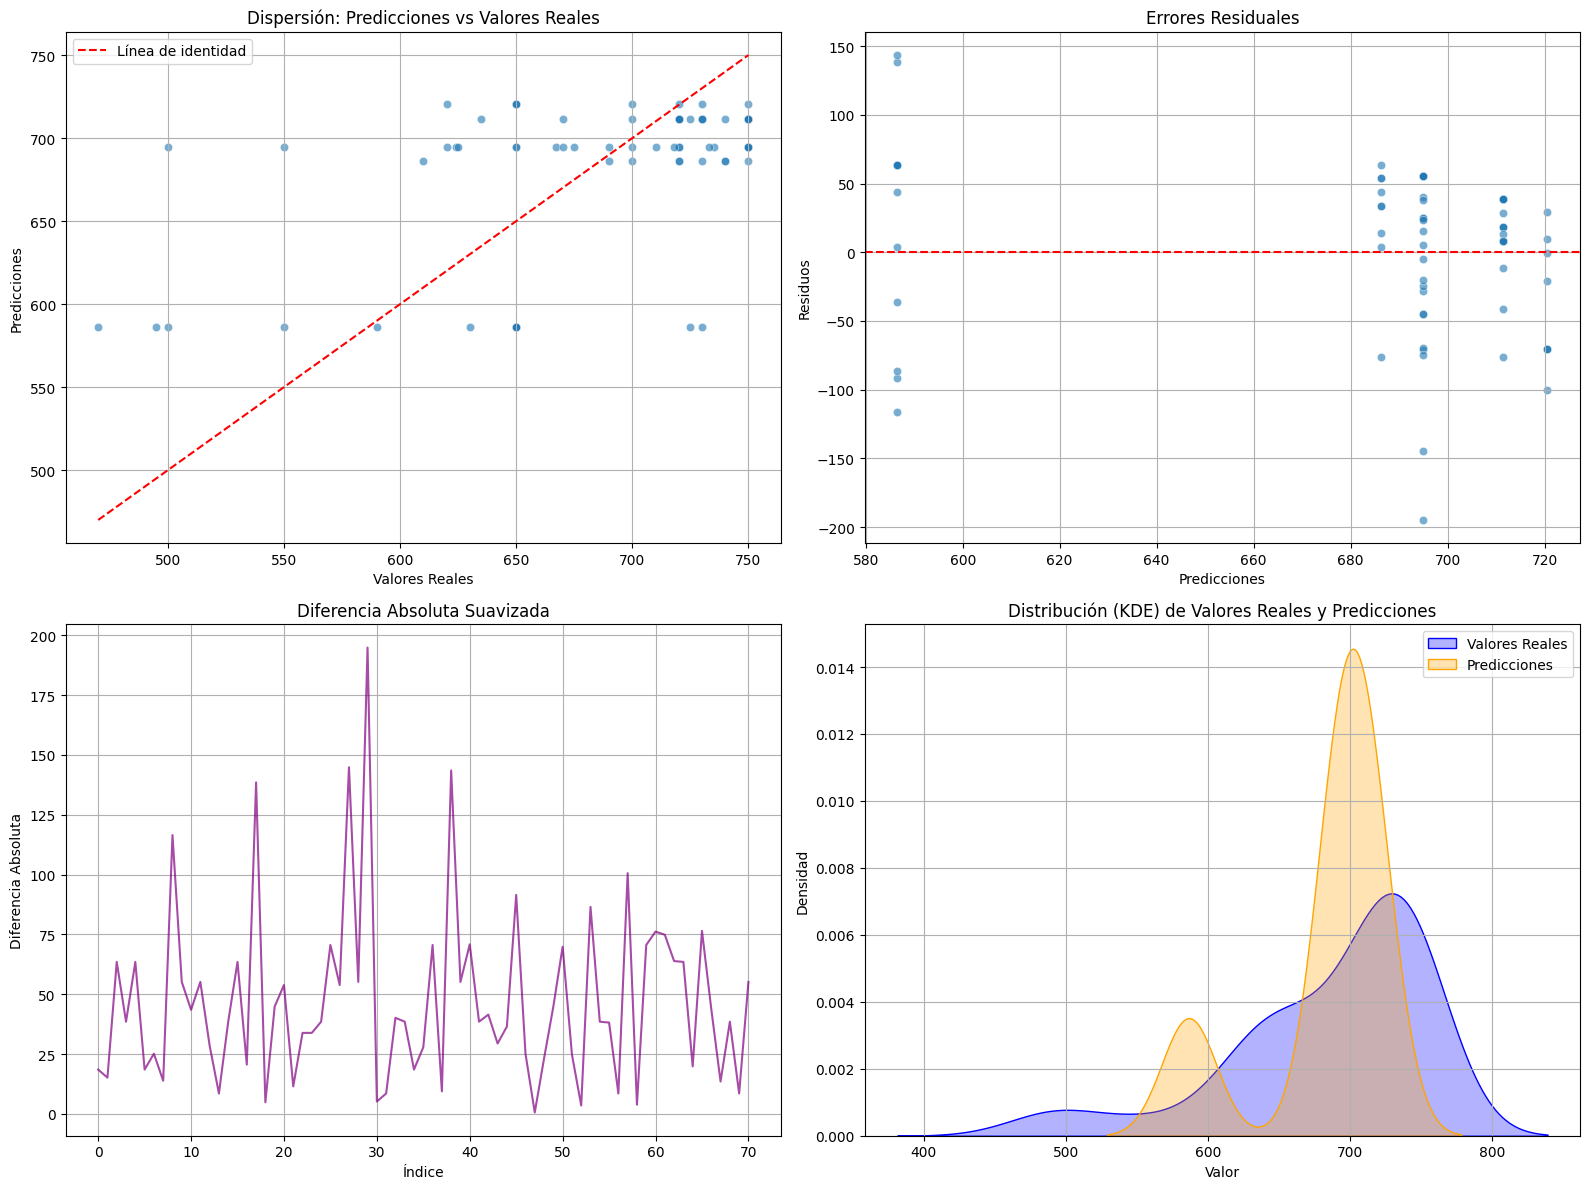

In [13]:
sp.comparativa_graficos( y_test2, y_pred_test2)

En los graficos igual.

#### COMPARATIVA DE METRICAS

1º modelo sin modificaciones

In [14]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.359900,46.798600,3750.265300,61.239400
Test,0.253600,46.642000,3544.248200,59.533600
Diferenceia Train-Test,0.106300,0.156600,206.017100,1.705800
Porcentaje diferencia (%),41.916400,0.335700,5.812700,2.865300
Media,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.044877,6.835093,533.586870,8.834432
Influencia dif media (%),0.015600,0.022900,30.139900,0.249600
Mediana,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.043204,6.580324,513.698134,8.505141
Influencia dif mediana (%),0.015000,0.022100,29.016500,0.240300


2º modelo retirando variables que no teinan correlacion con el la variable explicada 'Precio'

In [15]:
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

,r2_score,MAE,MSE,RMSE
Train,0.359900,46.917800,3750.665200,61.242700
Test,0.240300,47.382400,3607.348800,60.061200
Diferenceia Train-Test,0.119600,-0.464600,143.316400,1.181500
Porcentaje diferencia (%),49.771100,-0.990200,3.972900,1.967200
Media,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.043904,6.897972,538.231873,8.873267
Influencia dif media (%),0.017500,0.068000,20.966900,0.172900
Mediana,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.042268,6.640859,518.170000,8.542528
Influencia dif mediana (%),0.016800,0.065400,20.185400,0.166400


In [16]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_DecisionTreeRegressor2.pkl', 'wb') as file:
    pickle.dump(model_DecisionTreeRegressor2, file)